# STATISTICS & MACHINE LEARNING

## Logistic Regression using L1 and L2 loss


## Question :
## Find a dataset and implement logistic regression using L1 and L2 loss. Visualize and compare the results. Explain all of your parameter settings.

*** Let's get started with our analysis.***

*** We will firstly try and fit model to our dataset. ***

### Logistic Regression

- Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. 
- In statistics, logistic regression, or logit regression, or logit model[1] is a regression model where the dependent variable (DV) is categorical.


### ***  L2 Loss  ***
- L2 loss provides us with stable solution.
- It guarantees to provide us with always one solution.
- It is not very stable

In [196]:
# Lets start by Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [227]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/kshit/Desktop/Assignment3 IDS/Students.csv')
dataset.head()


,﻿Sid,Hours,Marks,Result
0,1,2.8,140.0,0
1,2,3.1,155.0,1
2,3,3.3,165.0,1
3,4,3.4,170.0,1
4,5,5.4,297.0,1


In [228]:
X=dataset.iloc[:,[1,2]].values
y=dataset.iloc[:,3].values

In [229]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [230]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

### Parameter Setting explanation for Logistic Regression
- penalty = "l2" for L2 norm losses
- random_state = 0 for singularity of output

In [231]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(penalty="l2",random_state = 0)
classifier1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [232]:
# Predicting the Test set results
y_pred1 = classifier1.predict(X_test)
y_pred1

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [233]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)

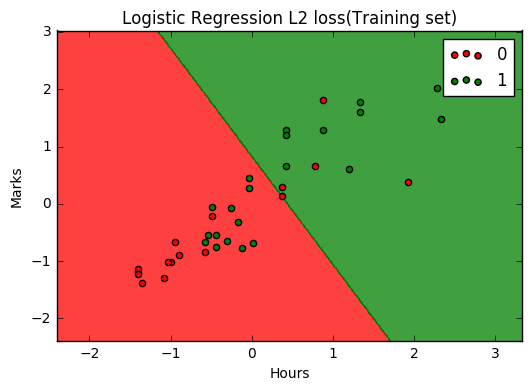

In [234]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression L2 loss(Training set)')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()
plt.show()

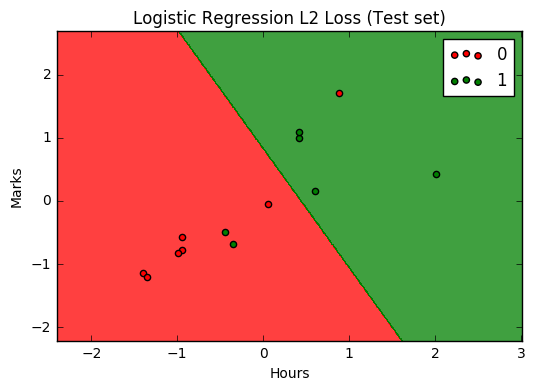

In [235]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression L2 Loss (Test set)')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()
plt.show()

In [236]:
accuracy1 = 1.0 - (float(np.count_nonzero(y_pred1-y_test)) / len(y_pred1-y_test))
accuracy1

0.6923076923076923

In [237]:
def MSE(y_pred, y_test1):
    return np.sum((y_pred1 - y_test)**2) / y_test.size
MSE(y_pred1, y_test)

0.30769230769230771

### ***  L2 Loss  ***
- L1 loss is robust technique.
- It provides us with multiple solutions.
- It is an unstable.

### Parameter Setting explanation for Logistic Regression
- penalty = "l1" for L1 norm losses
- random_state = 0 for singularity of output

In [238]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression('l1',random_state = 41)
classifier2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=41, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [239]:
y_pred2 = classifier2.predict(X_test)
y_pred2

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [240]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,y_pred2)
cm2

array([[5, 2],
       [2, 4]])

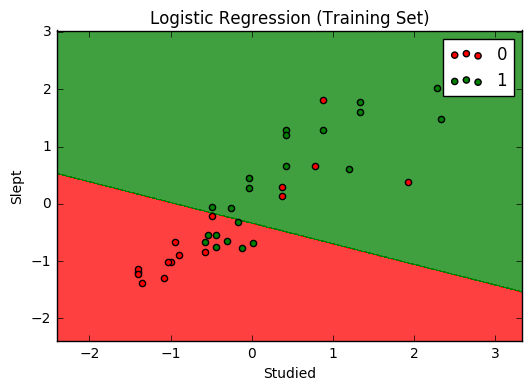

In [241]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train

X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                   np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1,X2,classifier2.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Studied')
plt.ylabel('Slept')
plt.legend()
plt.show()

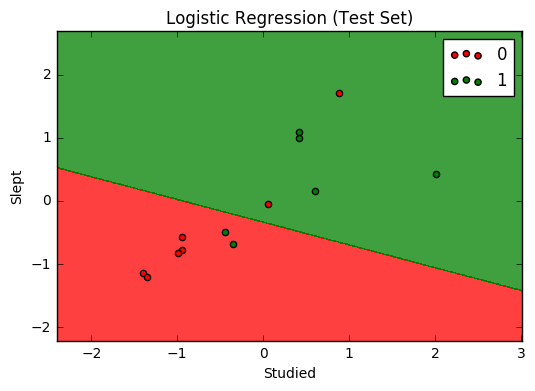

In [242]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_test,y_test

X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                   np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1,X2,classifier2.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Studied')
plt.ylabel('Slept')
plt.legend()
plt.show()

In [243]:
accuracy2 = 1.0 - (float(np.count_nonzero(y_pred2-y_test)) / len(y_pred2-y_test))
accuracy2

0.6923076923076923

In [244]:
def MSE(y_pred2, y_test):
    return np.sum((y_pred2 - y_test)**2) / y_test.size
MSE(y_pred2, y_test)

0.30769230769230771

# Conclusion
- From the graphs above we conclude that L2 loss gives us better results for our dataset.

## References
- http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/
- https://en.wikipedia.org/wiki/Logistic_regression
- https://www.udemy.com/machinelearning/learn/
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html